In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 第十一週:作業一  (酒的數據庫-分類)

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine=load_wine()

In [4]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [5]:
wine_data=pd.DataFrame(wine.data,columns=wine.feature_names)
wine_data['class']=wine.target
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
x=wine.data
y=wine.target

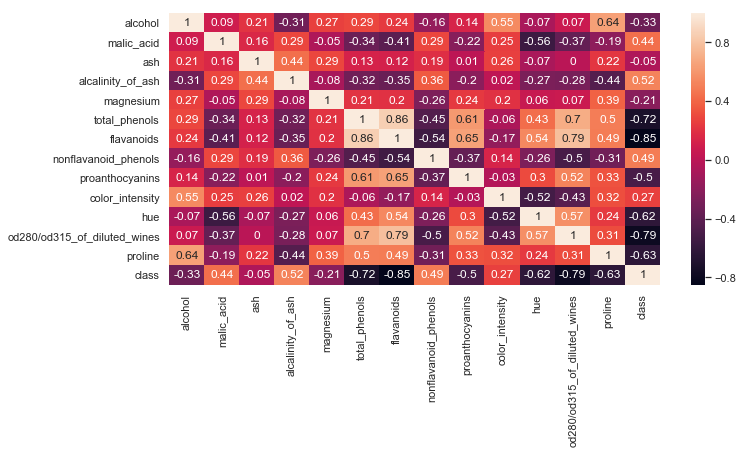

In [7]:
correlation_matrix=wine_data.corr().round(2)
sns.set(rc={'figure.figsize':(11,5)})
sns.heatmap(correlation_matrix,annot=True)

### 取正相關最大的兩個 "alcalinity_of_ash"跟"nonflavanoid_phenol"來分類

In [8]:
X1=x[:,[3,7]]        #取alcalinity_of_ash跟nonflavanoid_phenol來分類
Y=y

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y,
                                              test_size=0.25,
                                              random_state=0)

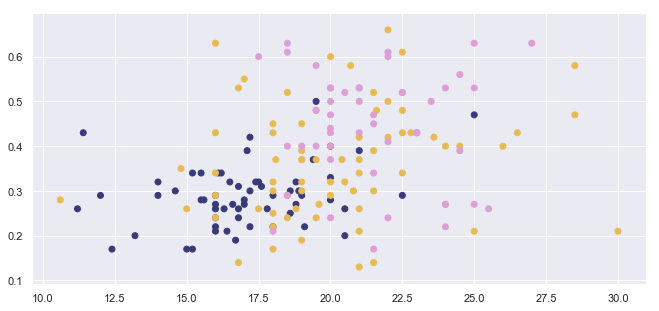

In [11]:
plt.scatter(X1[:,0],X1[:,1],c=Y,cmap='tab20b')

In [12]:
#三種點重複的很多，分起來效果可能會不太好

In [13]:
from sklearn.svm import SVC

In [14]:
clf=SVC(gamma='auto')

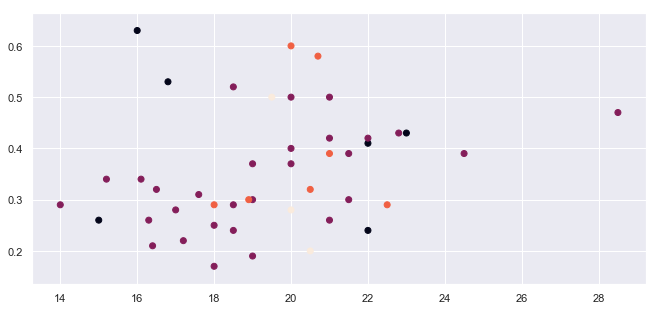

In [15]:
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)

In [16]:
#果然分起來錯誤率很高，化成等高線圖看看

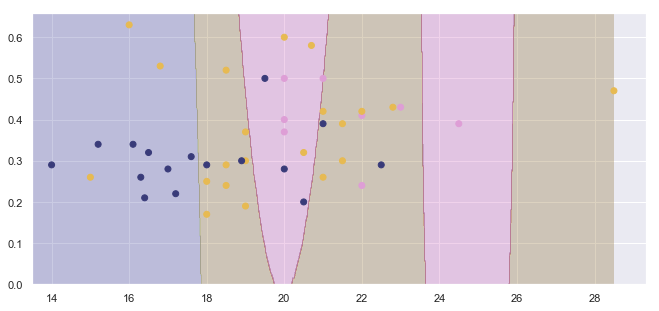

In [17]:
x0=np.arange(13.5,28.5,0.01)
y0=np.arange(0,0.67,0.01)

x1,x2=np.meshgrid(x0,y0)
A=np.c_[x1.ravel(),x2.ravel()]
b=clf.predict(A)
B=b.reshape(x1.shape)

plt.contourf(x1,x2,B,cmap='tab20b',alpha=0.3)

plt.scatter(x_test[:,0],x_test[:,1],cmap='tab20b',c=y_test)

In [18]:
#看起來分的蠻差的，改挑另外兩個變數來進行分類

### 改取最大負相關的兩個 "flavanoids"跟"od280/od315_of_diluted_wines"來預測

In [19]:
X2=x[:,[6,11]]        #取flavanoids跟od280/od315_of_diluted_wines來分類
Y=y

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X2,Y,
                                              test_size=0.25,
                                              random_state=0)

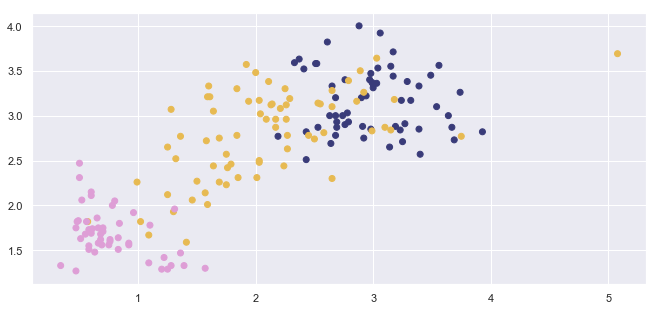

In [21]:
plt.scatter(X2[:,0],X2[:,1],c=Y,cmap='tab20b')

In [22]:
#看起來黃色和紫色的點重疊的那部份可能會比較不好分

In [23]:
clf=SVC(gamma='auto')

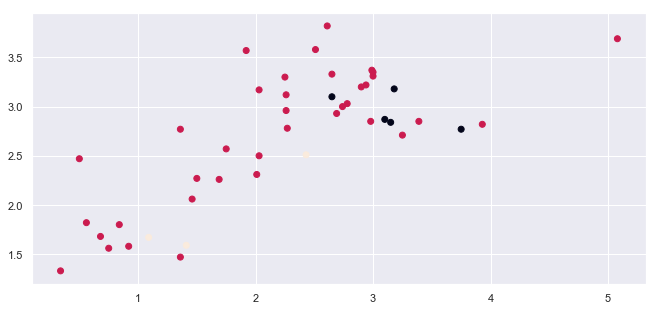

In [24]:
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)
plt.scatter(x_test[:,0],x_test[:,1],c=y_predict-y_test)

In [25]:
#分錯的點只有五個，看起來分的還不錯，以下化成等高線圖

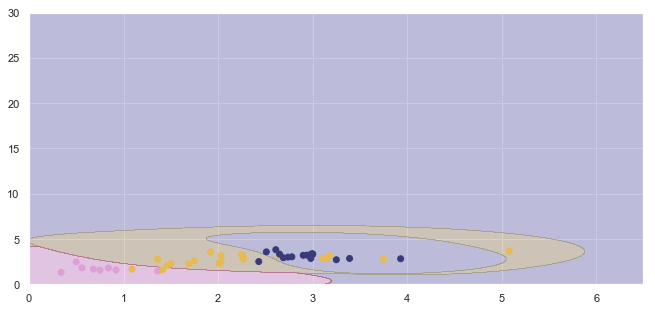

In [26]:
x0=np.arange(0,6.5,0.01)
y0=np.arange(0,30,0.01)

x1,x2=np.meshgrid(x0,y0)
A=np.c_[x1.ravel(),x2.ravel()]
b=clf.predict(A)
B=b.reshape(x1.shape)

plt.contourf(x1,x2,B,cmap='tab20b',alpha=0.3)

plt.scatter(x_test[:,0],x_test[:,1],cmap='tab20b',c=y_test)

In [27]:
#除了有少數幾個黃色點有分錯以外，其他都分的蠻不錯的!!